In [2]:
import scipy as sp
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
# Set color map to have light blue background
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline
import pandas as pd

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [5]:
df.tail()


id             date     price  bedrooms  bathrooms  \
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[5 rows x 21 columns]

In [6]:
print(df.date)
print(type(df.date.iloc[0]))

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object
<class 'str'>


In [8]:
# extract year and month info from the string
# create new features 'sales_year' and 'sales_month' in df

df['sales_year'] = df.date.apply(lambda x: int(x[:4]))
df['sales_month'] = df.date.apply(lambda x: int(x[4:6]))

In [9]:
df.groupby('sales_month')

In [10]:
print(df.groupby('sales_month')['id'].count())
print(df.groupby('sales_year')['id'].count())

sales_month
1      978
2     1250
3     1875
4     2231
5     2414
6     2180
7     2211
8     1940
9     1774
10    1878
11    1411
12    1471
Name: id, dtype: int64
sales_year
2014    14633
2015     6980
Name: id, dtype: int64


In [11]:
# your code here
most_sales_month=df.groupby('sales_month')['id'].count().idxmax()

# uncomment below and update the value as an integer
most_sales_month 

5

In [12]:
# your code here
least_sales_month=df.groupby('sales_month')['id'].count().idxmin()
# uncomment below and update the value as an integer
least_sales_month

1

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [14]:
# drop unnecessary features, replace df
# your code here
df = df.drop(columns=['date', 'id','zipcode'])


Get correlation matrix on the data frame

In [15]:
df.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036362  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
grade          0.667434  0.356967   0.664983     0.762704  0.113621  0.458183   
sqft_above     0.605567  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.323816  0.303093   0.283770     0.435043  0.015286 -0.245705   
yr_built       0.054012  0.154178   0.506019     0.318049  0.053080  0.489319   
yr_renovated   0.126434  0.018841   0.050739     0.055363  0.007644  0.006338   
lat            0.307003 -0.008931   0.024573     0.052529 -0.085683  0.049614   
long           0.021626  0.129473   0.223042     0.240223  0.229521  0.125419   
sqft_living15  0.585379  0.391638   0.568634     0.756420  0.144608  0.279885   
sqft_lot15     0.082447  0.029244   0.087175     0.183286  0.718557 -0.011269   
sales_year     0.003576 -0.009838  -0.026596    -0.029038  0.005468 -0.022315   
sales_month   -0.010081 -0.001533   0.007392     0.011810 -0.002369  0.014005   

               waterfront      view  condition     grade  sqft_above  \
price            0.266369  0.397293   0.036362  0.667434    0.605567   
bedrooms        -0.006582  0.079532   0.028472  0.356967    0.477600   
bathrooms        0.063744  0.187737  -0.124982  0.664983    0.685342   
sqft_living      0.103818  0.284611  -0.058753  0.762704    0.876597   
sqft_lot         0.021604  0.074710  -0.008958  0.113621    0.183512   
floors           0.023698  0.029444  -0.263768  0.458183    0.523885   
waterfront       1.000000  0.401857   0.016653  0.082775    0.072075   
view             0.401857  1.000000   0.045990  0.251321    0.167649   
condition        0.016653  0.045990   1.000000 -0.144674   -0.158214   
grade            0.082775  0.251321  -0.144674  1.000000    0.755923   
sqft_above       0.072075  0.167649  -0.158214  0.755923    1.000000   
sqft_basement    0.080588  0.276947   0.174105  0.168392   -0.051943   
yr_built        -0.026161 -0.053440  -0.361417  0.446963    0.423898   
yr_renovated     0.092885  0.103917  -0.060618  0.014414    0.023285   
lat             -0.014274  0.006157  -0.014941  0.114084   -0.000816   
long            -0.041910 -0.078400  -0.106500  0.198372    0.343803   
sqft_living15    0.086463  0.280439  -0.092824  0.713202    0.731870   
sqft_lot15       0.030703  0.072575  -0.003406  0.119248    0.194050   
sales_year      -0.004165  0.001364  -0.045589 -0.030387   -0.023823   
sales_month      0.008132 -0.005638   0.021978  0.008376    0.009872   

               sqft_basement  yr_built  yr_renovated       lat      long  \
price               0.323816  0.054012      0.126434  0.307003  0.021626   
bedrooms            0.303093  0.154178      0.018841 -0.008931  0.129473   
bathrooms           0.283770  0.506019      0.050739  0.024573  0.223042   
sqft_living         0.435043  0.318049      0.055363  0.052529  0.240223   
sqft_lot            0.015286  0.053080      0.007644 -0.085683  0.229521   
floors             -0.245705  0.489319      0.006338  0.049614  0.125419   
waterfront          0.080588 -0.026161      0.092885 -0.014274 -0.041910   
view                0.276947 -0.053440      0.103917  0.006157 -0.078400   
condition           0.174105 -0.361417     -0.060618 -0.014941 -0.106500   
grade               0.168392  0.446963     

Display the correlation matrix as heat map

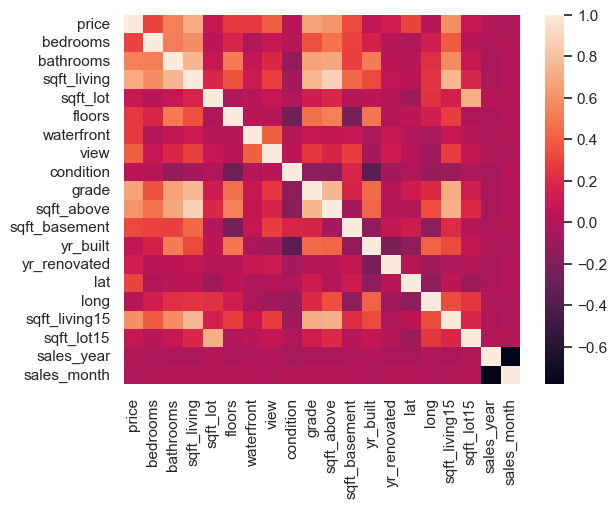

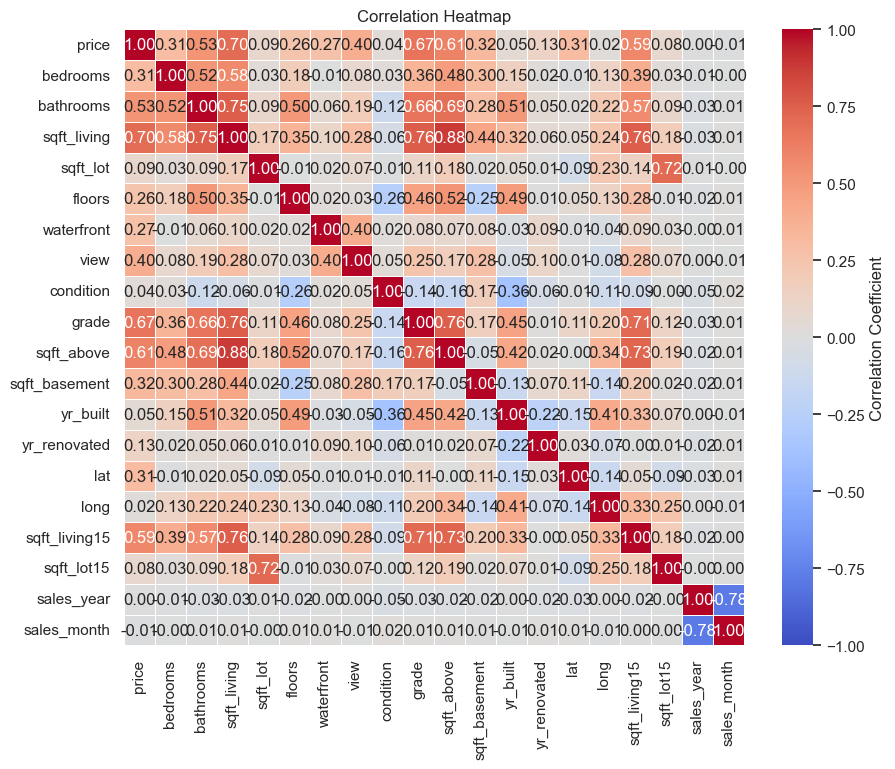

In [16]:
# practice visualizing correlation matrix using a heatmap
# your code here
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

# Improved heatmap with customizations
plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1,  # Set color range for correlation coefficients
    cmap='coolwarm',  # Choose a colormap
    annot=True,  # Display correlation coefficients on the cells
    fmt='.2f',  # Format the displayed coefficients with 2 decimal places
    linewidths=0.5,  # Adjust cell border width
    cbar_kws={'label': 'Correlation Coefficient'}  # Label for colorbar
)

plt.title("Correlation Heatmap")
plt.show()

Pair plot

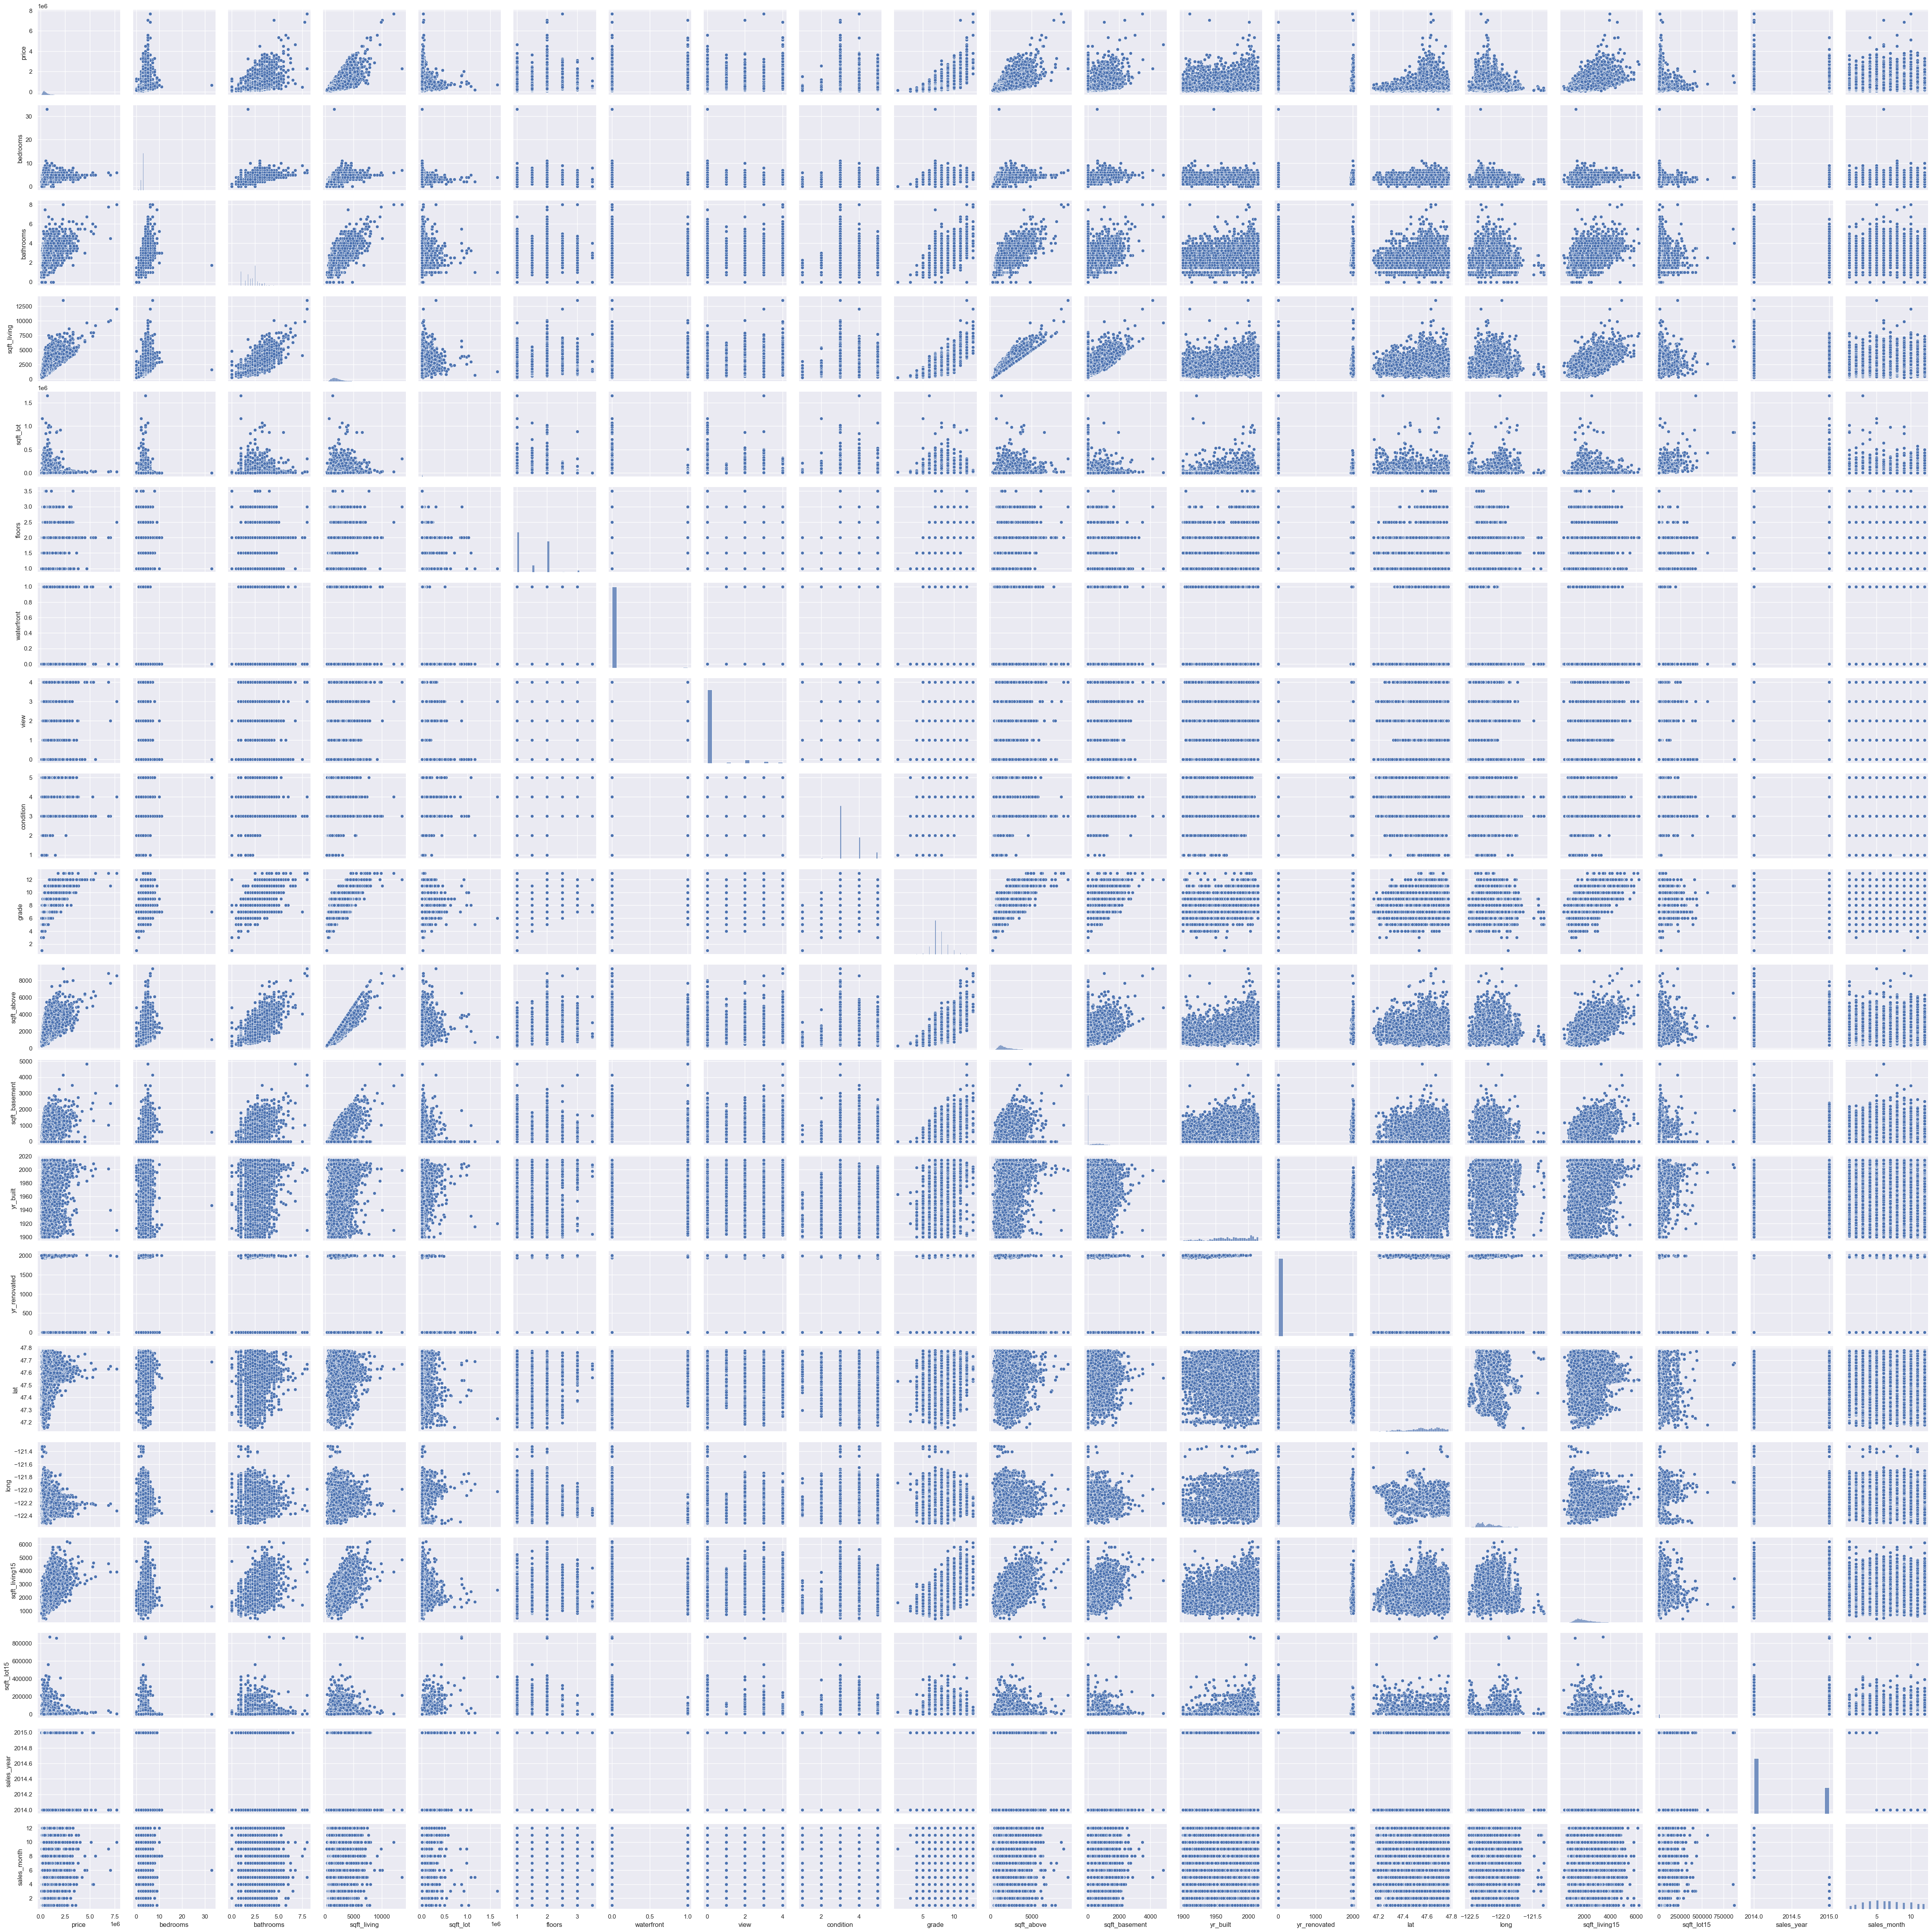

In [17]:
# practice inspecting relationships between features using a pair plot. 
# your code here
sns.pairplot(df)
plt.show()


In [18]:
from sklearn.model_selection import train_test_split

# your code here
x = df.drop('price', axis=1)
y = df['price']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2)


In [19]:
# Testing cell for self-check
assert(len(X_train) == 17290), "Check 3a, did you split properly so X_Train is 80% of the observations?"
assert(type(X_train)==type(pd.DataFrame())), "Check 3a, what type of object should X_train be?"

In [22]:
# use best_guess_predictor as a single predictor
# build a simple linear regression model, train on the X_train portion

# Make sure to use the `statsmodels.formula.api.ols` function for building the model. 
# model = 

#update following value according to the result
# adj_R2 =  

# your code here
import statsmodels.formula.api as smf
best_guess_predictor = 'sqft_living'


model = smf.ols(formula=f"Y_test ~ {best_guess_predictor}", data=X_test).fit()

adj_R2 =  0.513
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Y_test   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     4338.
Date:                Thu, 07 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:48:43   Log-Likelihood:                -59769.
No. Observations:                4323   AIC:                         1.195e+05
Df Residuals:                    4321   BIC:                         1.196e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.759e+04   9276.211     -2.974      